its 2023/06/27  
2335i  
its raining out side. its pouring. I am in my uni.  
lets get init  

## Machine Learning Practice with k-Nearest Neighbors (kNN) and the Crop Recommendation Dataset

In this practice, we will be working with the [Crop Recommendation Dataset](https://www.kaggle.com/atharvaingle/crop-recommendation-dataset) from Kaggle. Our goal is to apply the k-Nearest Neighbors (kNN) algorithm to this dataset in order to make crop recommendations based on various parameters of the soil and environment.

The Crop Recommendation Dataset provides various parameters such as:

- **N**: Nitrogen content ratio in the soil
- **P**: Phosphorus content ratio in the soil
- **K**: Potassium content ratio in the soil
- **Temperature**: Temperature in degree Celsius
- **Humidity**: Relative humidity in percentage
- **pH**: pH value of the soil
- **Rainfall**: Amount of rainfall in millimeters

In addition to these parameters, the dataset also provides a "Label" column which indicates the recommended crop to be grown under these conditions. We will use these labels as our target variable for our kNN model.

By the end of this practice, we will have a trained kNN model that can predict the most suitable crop to grow given the soil and environmental conditions. We will also evaluate the performance of our model and discuss the implications of our findings.

Let's get it


In [25]:
import pandas as pd

data = pd.read_csv('Crop_recommendation.csv')
#data = pd.read_csv('/kaggle/input/crop-dataset/Crop_recommendation.csv')
print(data)

        N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]


In [26]:
x = data.drop('label',axis=1)
y = data['label']

print(x.shape)
print(y.shape)
print(x)
print(y)


(2200, 7)
(2200,)
        N   P   K  temperature   humidity        ph    rainfall
0      90  42  43    20.879744  82.002744  6.502985  202.935536
1      85  58  41    21.770462  80.319644  7.038096  226.655537
2      60  55  44    23.004459  82.320763  7.840207  263.964248
3      74  35  40    26.491096  80.158363  6.980401  242.864034
4      78  42  42    20.130175  81.604873  7.628473  262.717340
...   ...  ..  ..          ...        ...       ...         ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507
2196   99  15  27    27.417112  56.636362  6.086922  127.924610
2197  118  33  30    24.131797  67.225123  6.362608  173.322839
2198  117  32  34    26.272418  52.127394  6.758793  127.175293
2199  104  18  30    23.603016  60.396475  6.779833  140.937041

[2200 rows x 7 columns]
0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 220

In [27]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
classes = LabelEncoder()
y = classes.fit_transform(data['label'].values)

print(y)#label datset
print(np.unique(y))#unique labels

[20 20 20 ...  5  5  5]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


In [28]:
yo = classes.inverse_transform(y)
print('int to str : ',np.unique(yo))

int to str :  ['apple' 'banana' 'blackgram' 'chickpea' 'coconut' 'coffee' 'cotton'
 'grapes' 'jute' 'kidneybeans' 'lentil' 'maize' 'mango' 'mothbeans'
 'mungbean' 'muskmelon' 'orange' 'papaya' 'pigeonpeas' 'pomegranate'
 'rice' 'watermelon']


In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1,stratify=y) #stratify means even data

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1540, 7)
(660, 7)
(1540,)
(660,)


In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)

x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

#check standard datas
print(x_train.head)
x_train_std[1:5,]

<bound method NDFrame.head of         N    P    K  temperature   humidity        ph    rainfall
940    39   30   38    20.126449  87.596296  6.965157  108.065579
1756   50   46   52    31.182984  90.216469  6.734006   54.018724
1059  117   86   53    25.196402  83.558299  5.703382  115.858608
1105   20   19   35    34.177198  50.621616  6.113935   98.006880
1278   39  129  203    34.389225  83.183928  5.863997   71.030016
...   ...  ...  ...          ...        ...       ...         ...
752    37   79   19    27.543848  69.347863  7.143943   69.408782
852    12   58   23    21.746001  63.395032  6.765091   50.433061
2153  120   20   34    23.569605  50.563397  6.906125  130.379712
1562    6  124  200    22.982081  93.845050  5.971332  109.585225
422    16   55   19    19.543141  47.191883  6.413544  192.437219

[1540 rows x 7 columns]>


array([[-0.00498351, -0.22732343,  0.07623836,  1.08568601,  0.84137531,
         0.32669802, -0.90699942],
       [ 1.81197088,  0.98675004,  0.09598059, -0.09546165,  0.54256954,
        -0.98948268,  0.22408487],
       [-0.81854517, -1.04682302, -0.25937964,  1.67644189, -0.93556488,
        -0.46517658, -0.10243271],
       [-0.30328945,  2.29187902,  3.05731585,  1.71827464,  0.52576851,
        -0.78436585, -0.59585386]])

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,p=2)#p=2 means eculidean

knn.fit(x_train,y_train) #making model

KNeighborsClassifier()

In [32]:
y_train_pred = knn.predict(x_train)
y_test_pred = knn.predict(x_test)

print('Misclassified training samples : %d'%((y_train != y_train_pred).sum()))
print('Misclassified test samples : %d'%((y_test != y_test_pred).sum()))

Misclassified training samples : 16
Misclassified test samples : 13


In [33]:
from sklearn.metrics import accuracy_score

print('The accuracy ! : %.2f' % accuracy_score(y_test , y_test_pred))


The accuracy ! : 0.98


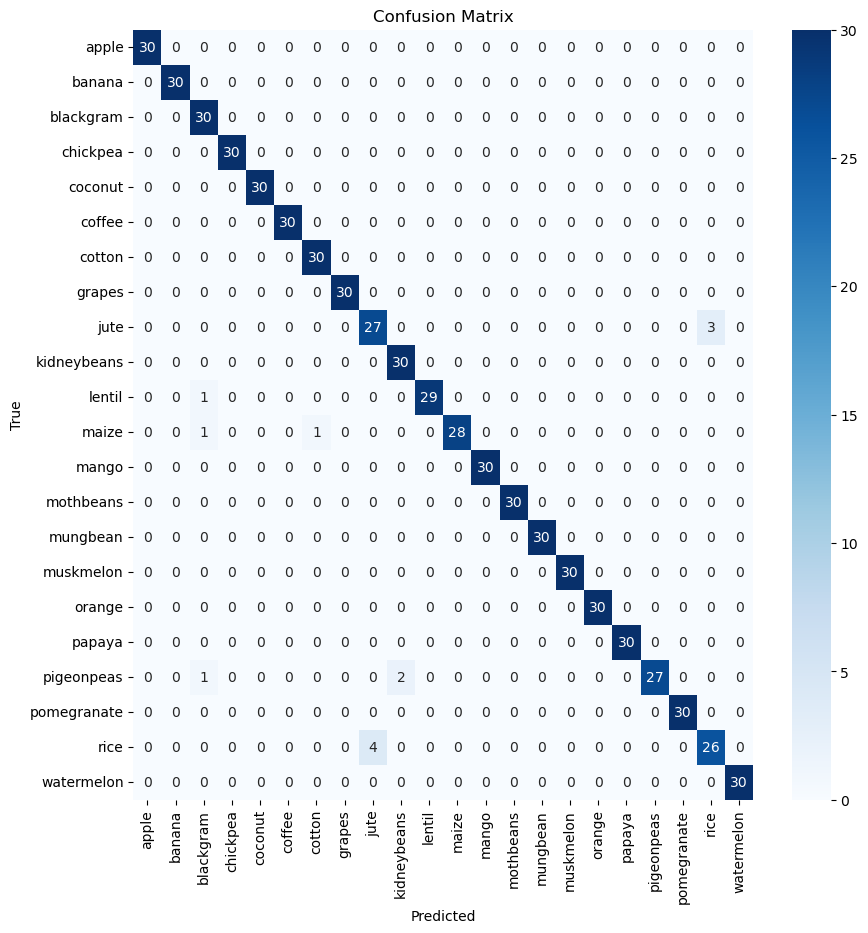

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# 예측값과 실제값 기반으로 confusion matrix 생성
conf = confusion_matrix(y_true=y_test, y_pred=y_test_pred)

# 클래스 레이블
labels = ['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee', 'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize', 'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya', 'pigeonpeas', 'pomegranate', 'rice', 'watermelon']

# confusion matrix 시각화
plt.figure(figsize=(10,10))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
